# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [49]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [50]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.77, 'feels_like': 285.54, 'temp_min': 284.51, 'temp_max': 286.62, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 192, 'gust': 1.79}, 'clouds': {'all': 75}, 'dt': 1669561426, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1669534679, 'sunset': 1669564714}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
# # set up lists to hold reponse info
# lat = []
# maxtemp = []
# lon = []
# wind_sp = []
# clouds = []
# country = []
# date = []

# # Loop through the list of cities and perform a request for data on each
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     lon.append(response['coord']['lon'])
#     temp.append(response['main']['temp_max'])
    

In [53]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

r_count = 1
count = 1
print("Beginning Data Retrieval")
print("-----------------------------")

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        count += 1
        r_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (r_count, count, city))

    # Add 1 to the record count
    r_count += 1
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

        





Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 9 of Set 1 | visnes
Processing Record 10 of Set 1 | sambava
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | taguatinga
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | chitrakonda
Proc

Processing Record 34 of Set 4 | esperance
Processing Record 35 of Set 4 | padang
Processing Record 36 of Set 4 | andenes
Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | constantine
Processing Record 39 of Set 4 | altay
Processing Record 40 of Set 4 | eureka
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | rafsanjan
Processing Record 44 of Set 4 | campbell river
Processing Record 45 of Set 4 | khasan
Processing Record 46 of Set 4 | lincoln
Processing Record 47 of Set 4 | bonavista
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | sampang
Processing Record 0 of Set 5 | tutoia
Processing Record 1 of Set 5 | half moon bay
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | colac
Processing Record 4 of Set 5 | bartlesville
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | chihuahua
Processing Record 7 of Set 5 | zarya
Processing Record 8 o

Processing Record 26 of Set 8 | gazimurskiy zavod
Processing Record 27 of Set 8 | talnakh
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | trelew
Processing Record 30 of Set 8 | broome
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | bagotville
Processing Record 33 of Set 8 | silver city
Processing Record 34 of Set 8 | tome
Processing Record 35 of Set 8 | eldikan
City not found. Skipping...
Processing Record 36 of Set 8 | promyshlennaya
Processing Record 37 of Set 8 | yakeshi
Processing Record 38 of Set 8 | ramhormoz
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | ishigaki
Processing Record 41 of Set 8 | narasannapeta
Processing Record 42 of Set 8 | bitkine
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | samarai
Processing Record 45 of Set 8 | rincon
Processing Record 46 of Set 8 | kintampo
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | codrington
Processing Re

Processing Record 16 of Set 12 | damienesti
Processing Record 17 of Set 12 | serebryansk
Processing Record 18 of Set 12 | vostok
Processing Record 19 of Set 12 | hirara
Processing Record 20 of Set 12 | sakaiminato
Processing Record 21 of Set 12 | la tuque
Processing Record 22 of Set 12 | roald
Processing Record 23 of Set 12 | mbanza-ngungu
Processing Record 24 of Set 12 | eyl
Processing Record 25 of Set 12 | vila franca do campo
Processing Record 26 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 27 of Set 12 | ereymentau
Processing Record 28 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 29 of Set 12 | vidim
Processing Record 30 of Set 12 | mersing
Processing Record 31 of Set 12 | bell ville
Processing Record 32 of Set 12 | raga
Processing Record 33 of Set 12 | puerto del rosario
Processing Record 34 of Set 12 | lingao
Processing Record 35 of Set 12 | nhulunbuy
Processing Record 36 of Set 12 | jablah
Processing Record 37 of Set 12 | cardston
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
city_df = pd.DataFrame(city_data)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,54.93,76,0,15.05,AU,1669562525
1,cape town,-33.9258,18.4232,82.11,52,0,21.85,ZA,1669562526
2,thompson,55.7435,-97.8558,14.16,92,100,3.44,CA,1669562528
3,touros,-5.1989,-35.4608,85.44,58,100,11.65,BR,1669562493
4,avarua,-21.2078,-159.7750,73.45,78,20,5.75,CK,1669562532
...,...,...,...,...,...,...,...,...,...
596,hurghada,27.2574,33.8129,73.44,43,0,2.30,EG,1669563248
597,kinablangan,7.6947,126.5503,77.86,86,55,7.56,PH,1669563321
598,sistranda,63.7256,8.8340,48.16,69,92,7.11,NO,1669563322
599,duki,30.1541,68.5728,59.72,16,0,3.87,PK,1669563323


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
for i, row in city_df.iterrows():
    if row.Humidity > 100:
        print(row.Humidity)

In [66]:
city_df[city_df.Humidity > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [67]:
#  Get the indices of cities that have humidity over 100%.


In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

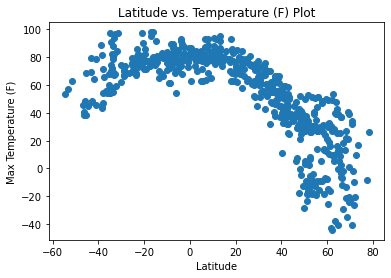

In [105]:
plt.scatter(city_df.Lat, city_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature (F) Plot")

plt.savefig("Latitude_Temperature_Plot.png")
plt.show()

Temperature tends to be higher towards the equator (0 latitude). Also the max temperature gets lower when the latitude gets higher. This may look this way becuase there is less data from latitudes lower than 0 compared to the amount of data from above 0. This is hard to say with absolute certainty from just looking at this graph though. 

## Latitude vs. Humidity Plot

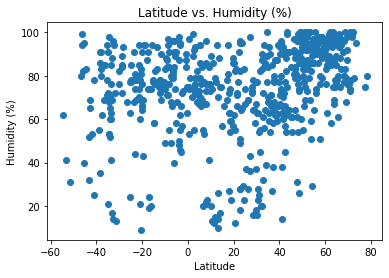

In [104]:
plt.scatter(city_df.Lat, city_df.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (%)")

plt.savefig("Latitude_Humidity_Plot.png")
plt.show()

There doesn't seem to be a strong correlation in this graph. There is a grouping of data points towards higher humidity and higher latitude so there may be some correlation but nothing clear.

## Latitude vs. Cloudiness Plot

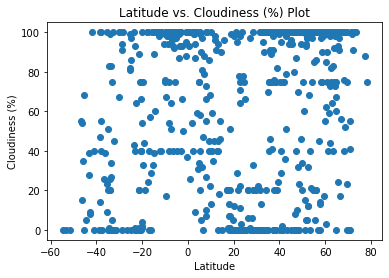

In [103]:
plt.scatter(city_df.Lat, city_df.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%) Plot")

plt.savefig("Latitude_Cloudiness_Plot.png")
plt.show()

There is no correlation between cloudiness and latitude as shown in this graph

## Latitude vs. Wind Speed Plot

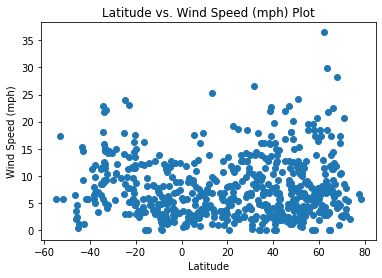

In [106]:
plt.scatter(city_df.Lat, city_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) Plot")

plt.savefig("Latitude_Wind_Speed_Plot.png")
plt.show()

Wind Speed tends to be lower than 15 mph at all latitudes. There are some outliers above 15 mph with the highest being above 35 mph.

## Linear Regression

In [73]:
nh_df = city_df[city_df.Lat >= 0].copy()
sh_df = city_df[city_df.Lat < 0].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6844238810819108


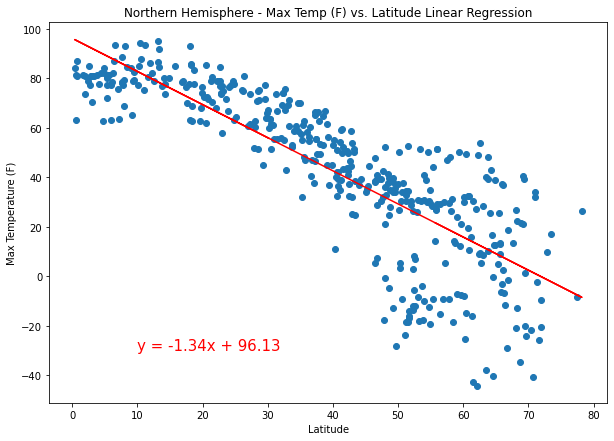

In [107]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = nh_df.Lat
y_values = nh_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')


print(f"The r-squared is: {rvalue**2}")

plt.savefig("North_Hem_Max_Temp_vs_Lat_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2838279761646837


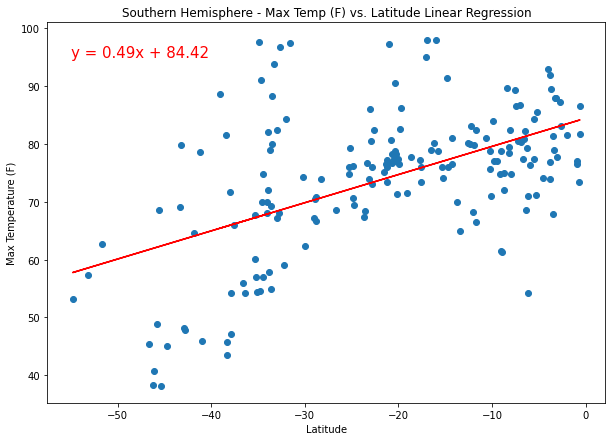

In [109]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = sh_df.Lat
y_values = sh_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')

plt.savefig("South_Hem_Max_Temp_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a correlation between temperature and latitude in both the southern and northern latitude graphs for Max Temp. The graphs show that as the latitude gets closer to 0 (the equator), the temperature gets higher. This shows as a negative correlation for the Northern Hemisphere and as a positive correlation for the Southern Hemisphere. The regression line also seems to be correct for the portions of the data split into North and South, but would be much different they were combined. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15891192554090536


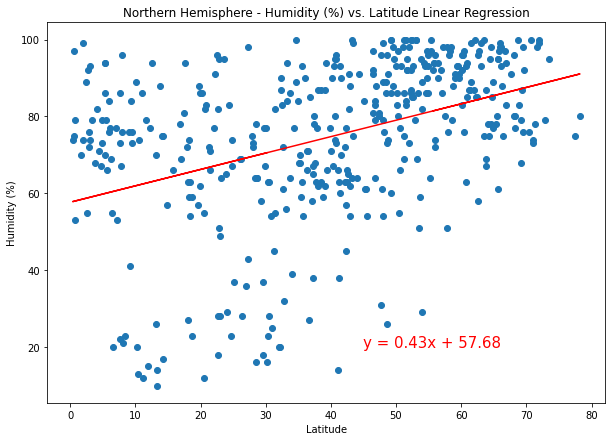

In [102]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = nh_df.Lat
y_values = nh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("North_Hem_Humidity_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02748633677826479


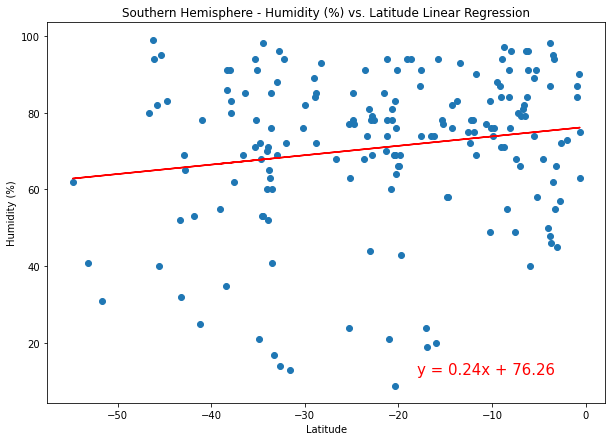

In [101]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = sh_df.Lat
y_values = sh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18, 12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("South_Hem_Humidity_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Both the graphs have a regression line showing a positive correlation but the Southern Hemisphere's regression line has a smaller slope. The majority of the plots are above 60% humidity and the regression lines on both plots are mostly above 60% Humidity as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06032682360370604


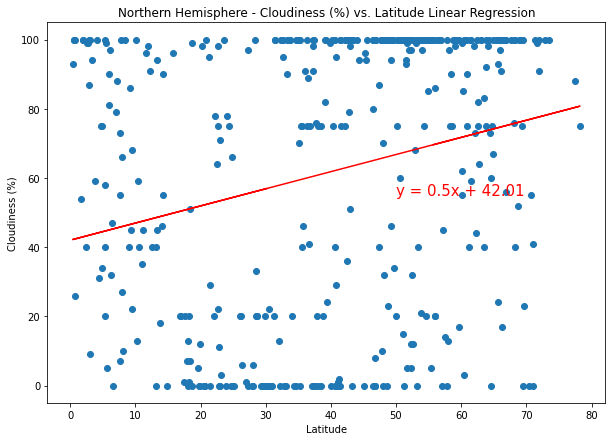

In [100]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = nh_df.Lat
y_values = nh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.savefig("North_Hem_Cloudiness_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27767539713416234


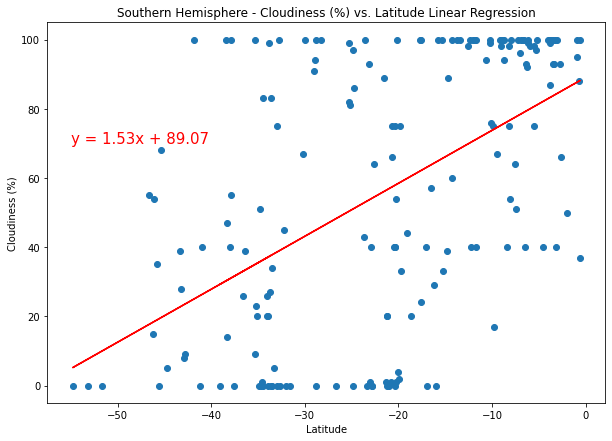

In [99]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = sh_df.Lat
y_values = sh_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.savefig("South_Hem_Cloudiness_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The plotted points are not closly fitted to the regression line and the the line would not be able to accurately predeict any of the points. Cloudiness and latitude do not appear to be closely correlated at all.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022747618538486482


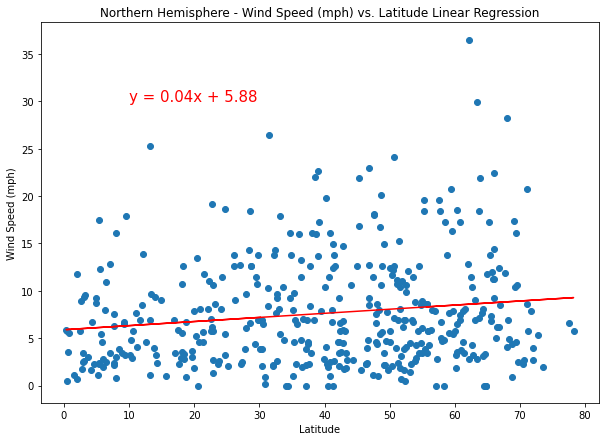

In [97]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = nh_df.Lat
y_values = nh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.savefig("North_Hem_Wind_Speed_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05770388196992748


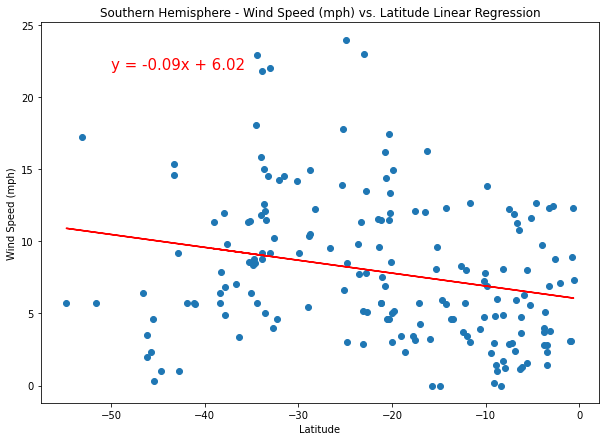

In [98]:
# Print out the r-squared value along with the plot.
plt.figure(figsize = (10,7))
x_values = sh_df.Lat
y_values = sh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.savefig("South_Hem_Wind_Speed_vs_Lat_Linear_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The points are more closely grouped around the regression line in the Northern Hemisphere graph than they are on the Southern Hemisphere graph. The regression line predicts that in the Northen Hemisphere the windiness will slightly increase as the latitude increases. The Southern Hemisphere graph's regression line shows that cloudiness will decrease as the latitude increases. The points are not closely grouped around the line enough to use the regression for prediction and if the graphs were combined then the combined regression line would 

In [83]:
city_df.to_csv("weatherpy.csv", index_label = "ID")
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,54.93,76,0,15.05,AU,1669562525
1,cape town,-33.9258,18.4232,82.11,52,0,21.85,ZA,1669562526
2,thompson,55.7435,-97.8558,14.16,92,100,3.44,CA,1669562528
3,touros,-5.1989,-35.4608,85.44,58,100,11.65,BR,1669562493
4,avarua,-21.2078,-159.7750,73.45,78,20,5.75,CK,1669562532
...,...,...,...,...,...,...,...,...,...
596,hurghada,27.2574,33.8129,73.44,43,0,2.30,EG,1669563248
597,kinablangan,7.6947,126.5503,77.86,86,55,7.56,PH,1669563321
598,sistranda,63.7256,8.8340,48.16,69,92,7.11,NO,1669563322
599,duki,30.1541,68.5728,59.72,16,0,3.87,PK,1669563323
